In [1]:
# pip install prophet
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
happiness = pd.read_csv("Resources/World Happiness Report 2005 to 2023.csv")
happiness.head()

Country Name Regional Indicator  Year  Life Ladder  Log GDP Per Capita  \
0  Afghanistan         South Asia  2008     3.723590            7.350416   
1  Afghanistan         South Asia  2009     4.401778            7.508646   
2  Afghanistan         South Asia  2010     4.758381            7.613900   
3  Afghanistan         South Asia  2011     3.831719            7.581259   
4  Afghanistan         South Asia  2012     3.782938            7.660506   

   Social Support  Healthy Life Expectancy At Birth  \
0        0.450662                         50.500000   
1        0.552308                         50.799999   
2        0.539075                         51.099998   
3        0.521104                         51.400002   
4        0.520637                         51.700001   

   Freedom To Make Life Choices  Generosity  Perceptions Of Corruption  \
0                      0.718114    0.167652                   0.881686   
1                      0.678896    0.190809                   0.850035   
2                      0.600127    0.121316                   0.706766   
3                      0.495901    0.163571                   0.731109   
4                      0.530935    0.237588                   0.775620   

   Positive Affect  Negative Affect  Confidence In National Government  
0         0.414297         0.258195                           0.612072  
1         0.481421         0.237092                           0.611545  
2         0.516907         0.275324                           0.299357  
3         0.479835         0.267175                           0.307386  
4         0.613513         0.267919                           0.435440

In [3]:
numerical_cols = ['Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption', 'Positive Affect', 'Negative Affect', 'Confidence In National Government']
for col in numerical_cols:
    happiness[col].fillna(happiness[col].median(), inplace=True)  # Using median for imputation


In [4]:
# For categorical columns like 'Regional Indicator', you might want to use mode
happiness['Regional Indicator'].fillna(happiness['Regional Indicator'].mode()[0], inplace=True)

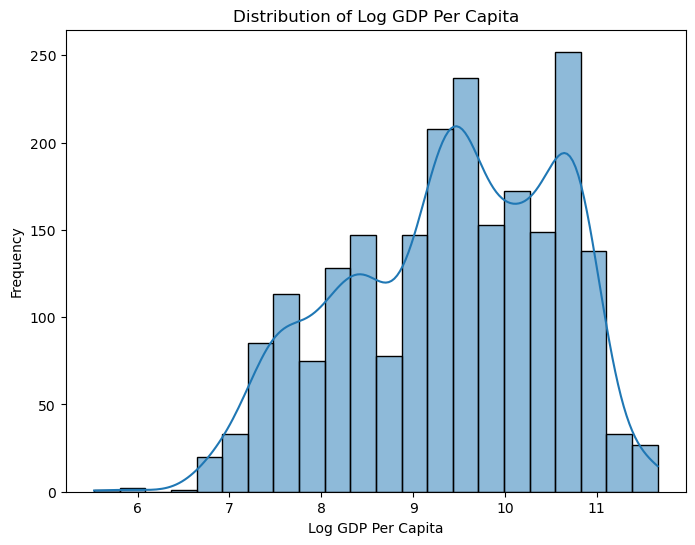

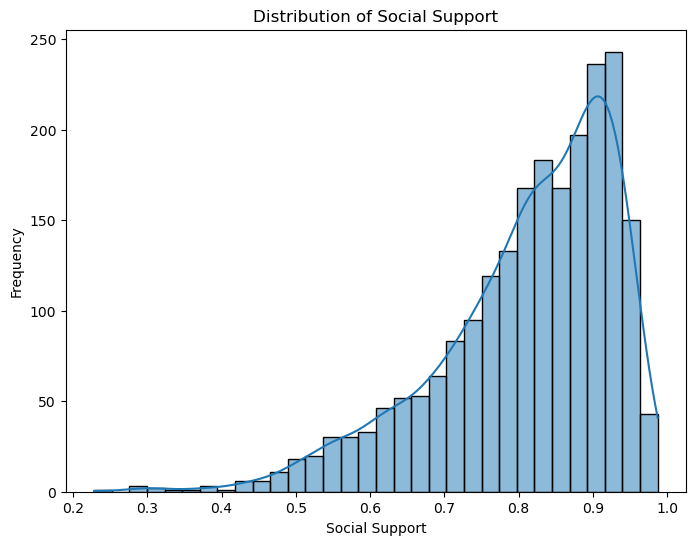

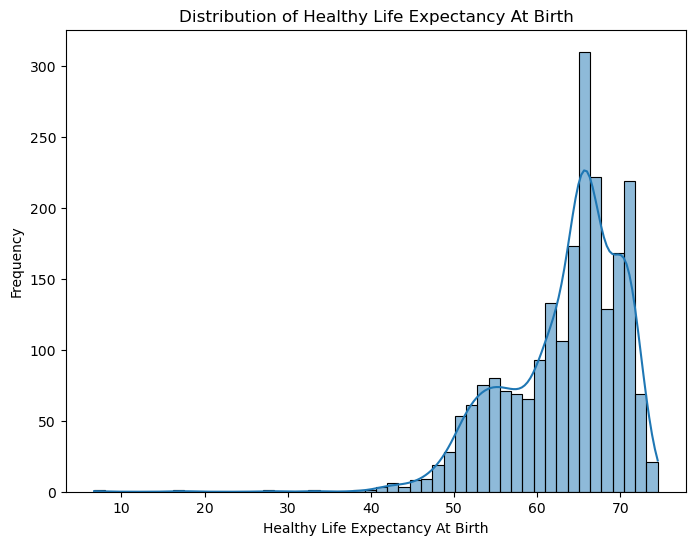

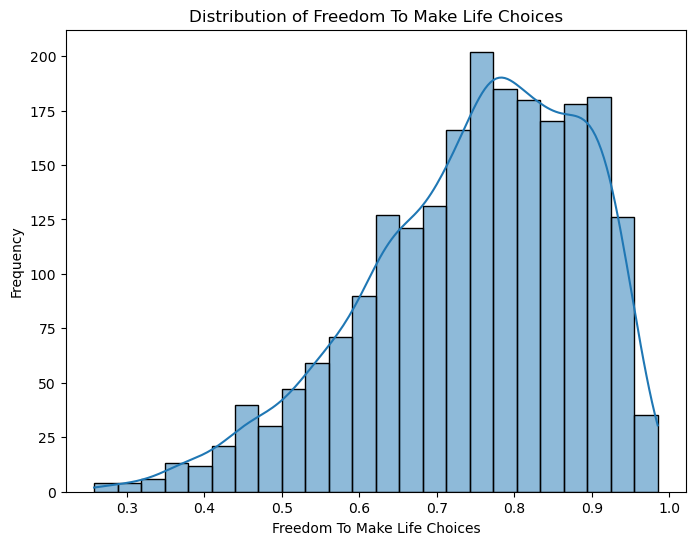

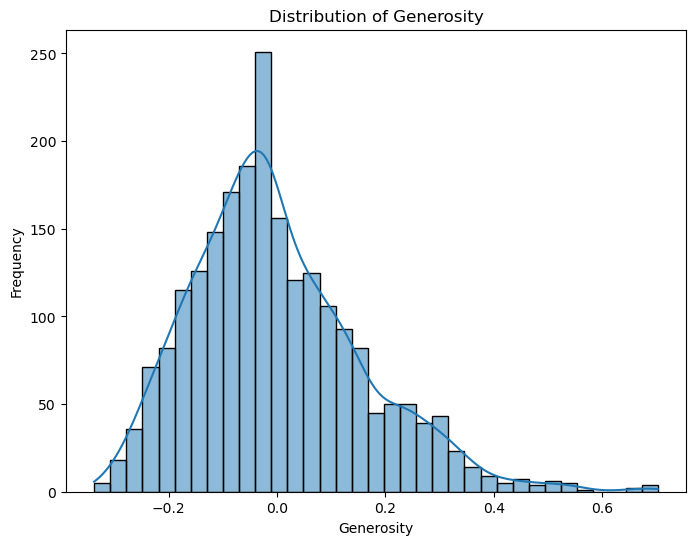

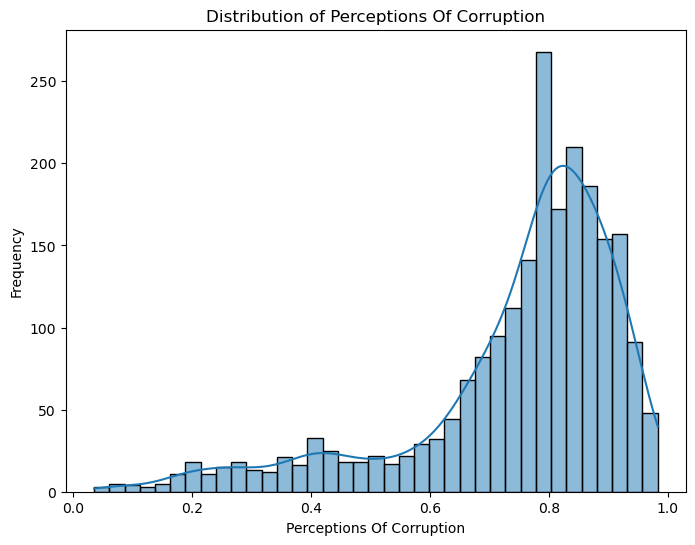

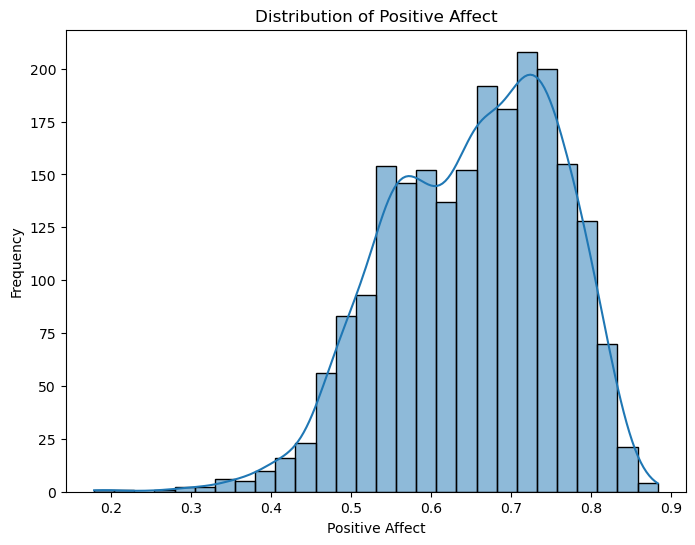

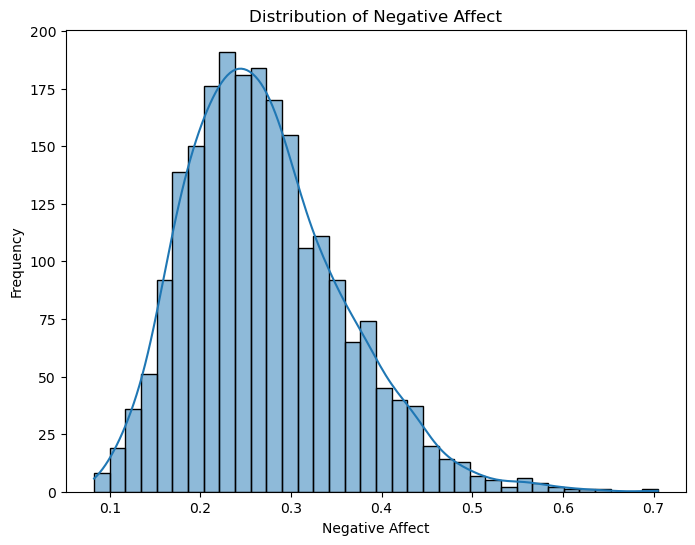

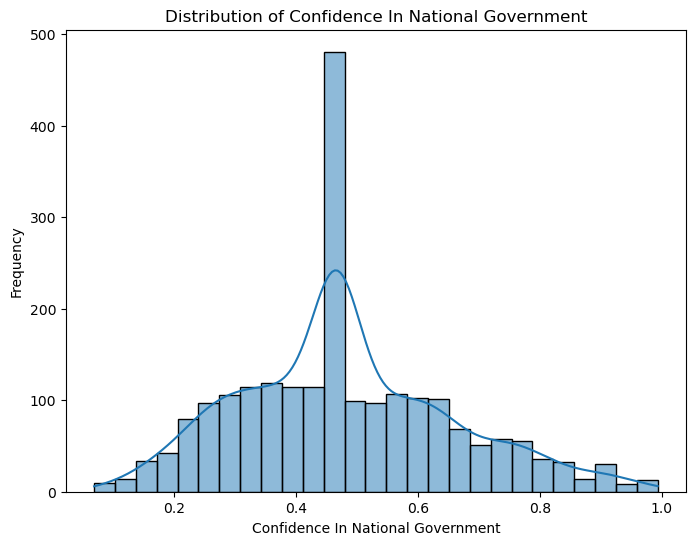

In [5]:
# Alternatively, you can drop rows with missing values
# happiness.dropna(inplace=True)

# Explore distributions and outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(happiness[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


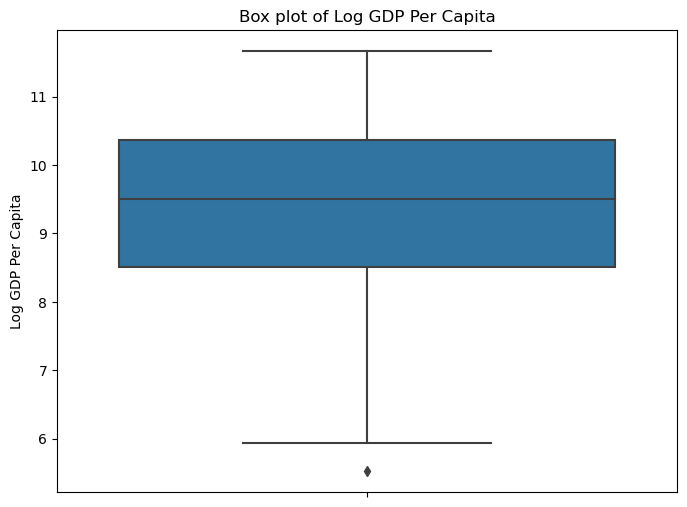

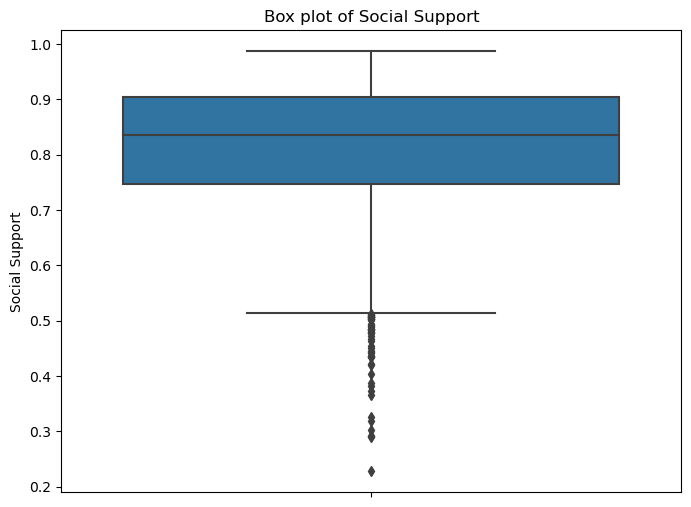

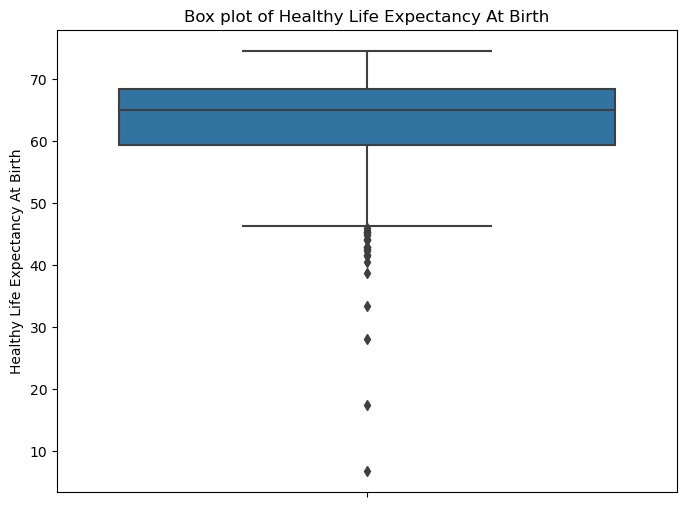

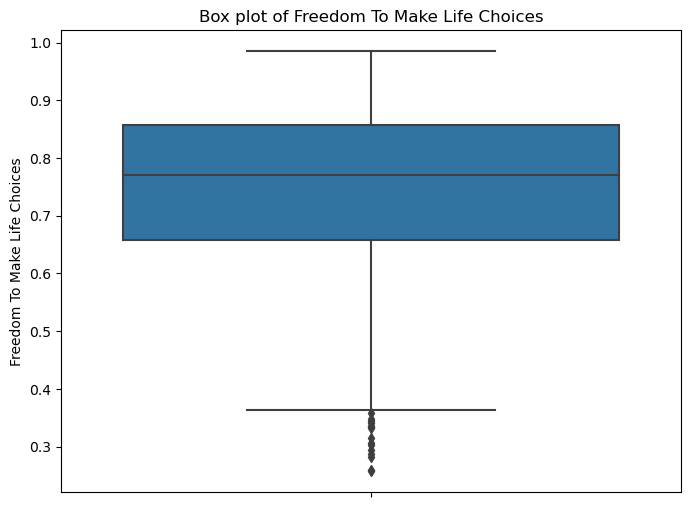

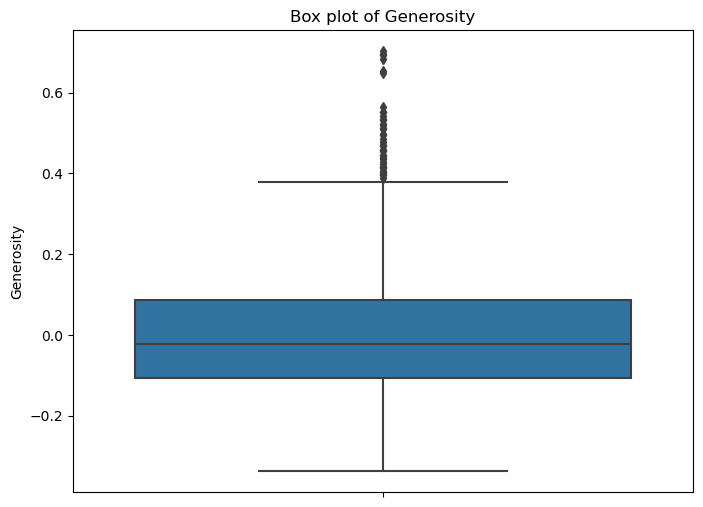

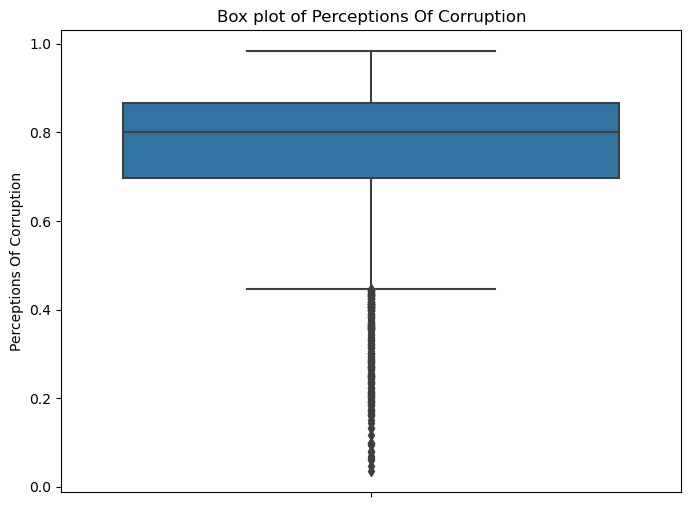

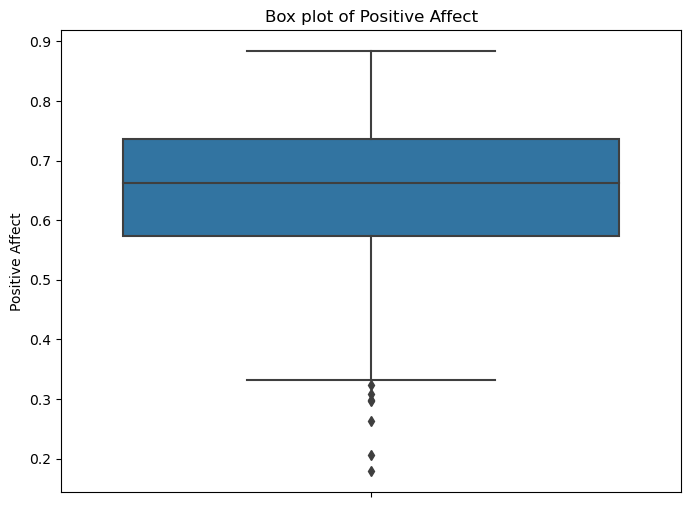

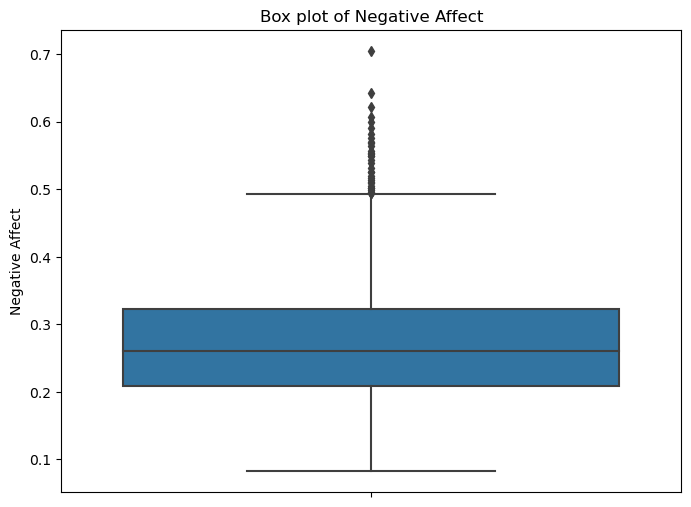

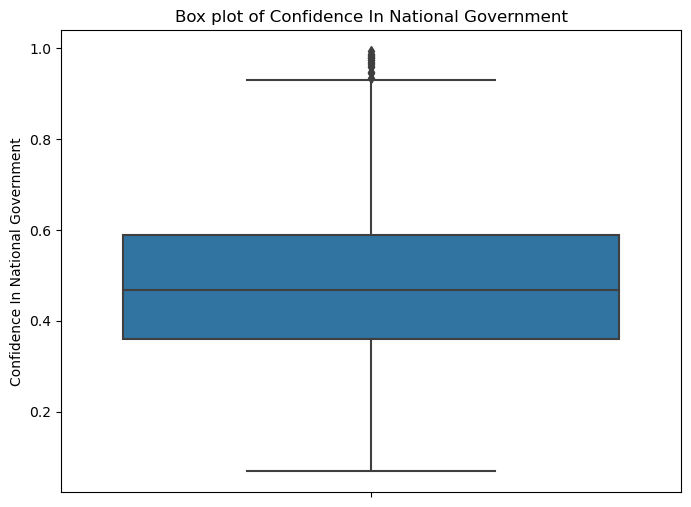

In [6]:
# Box plots
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=happiness[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
    plt.show()

In [7]:
# Summary statistics
print(happiness.describe())


              Year  Life Ladder  Log GDP Per Capita  Social Support  \
count  2199.000000  2199.000000         2199.000000     2199.000000   
mean   2014.161437     5.479226            9.390759        0.810826   
std       4.718736     1.125529            1.148175        0.120609   
min    2005.000000     1.281271            5.526723        0.228217   
25%    2010.000000     4.646750            8.505131        0.747512   
50%    2014.000000     5.432437            9.498955        0.835535   
75%    2018.000000     6.309460           10.366237        0.904607   
max    2022.000000     8.018934           11.663788        0.987343   

       Healthy Life Expectancy At Birth  Freedom To Make Life Choices  \
count                       2199.000000                   2199.000000   
mean                          63.337690                      0.748187   
std                            6.821220                      0.139120   
min                            6.720000                      0.25753

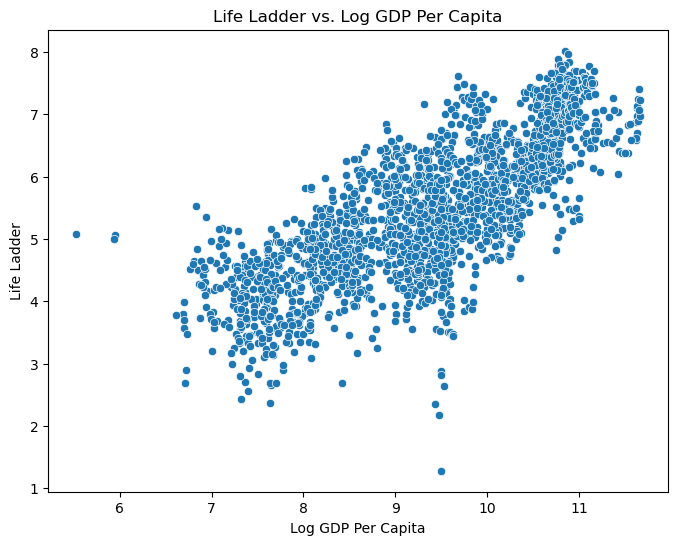

In [8]:
# Scatter plots (for bivariate analysis)
# Example: Life Ladder vs. Log GDP Per Capita
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Log GDP Per Capita', y='Life Ladder', data=happiness)
plt.title('Life Ladder vs. Log GDP Per Capita')
plt.xlabel('Log GDP Per Capita')
plt.ylabel('Life Ladder')
plt.show()

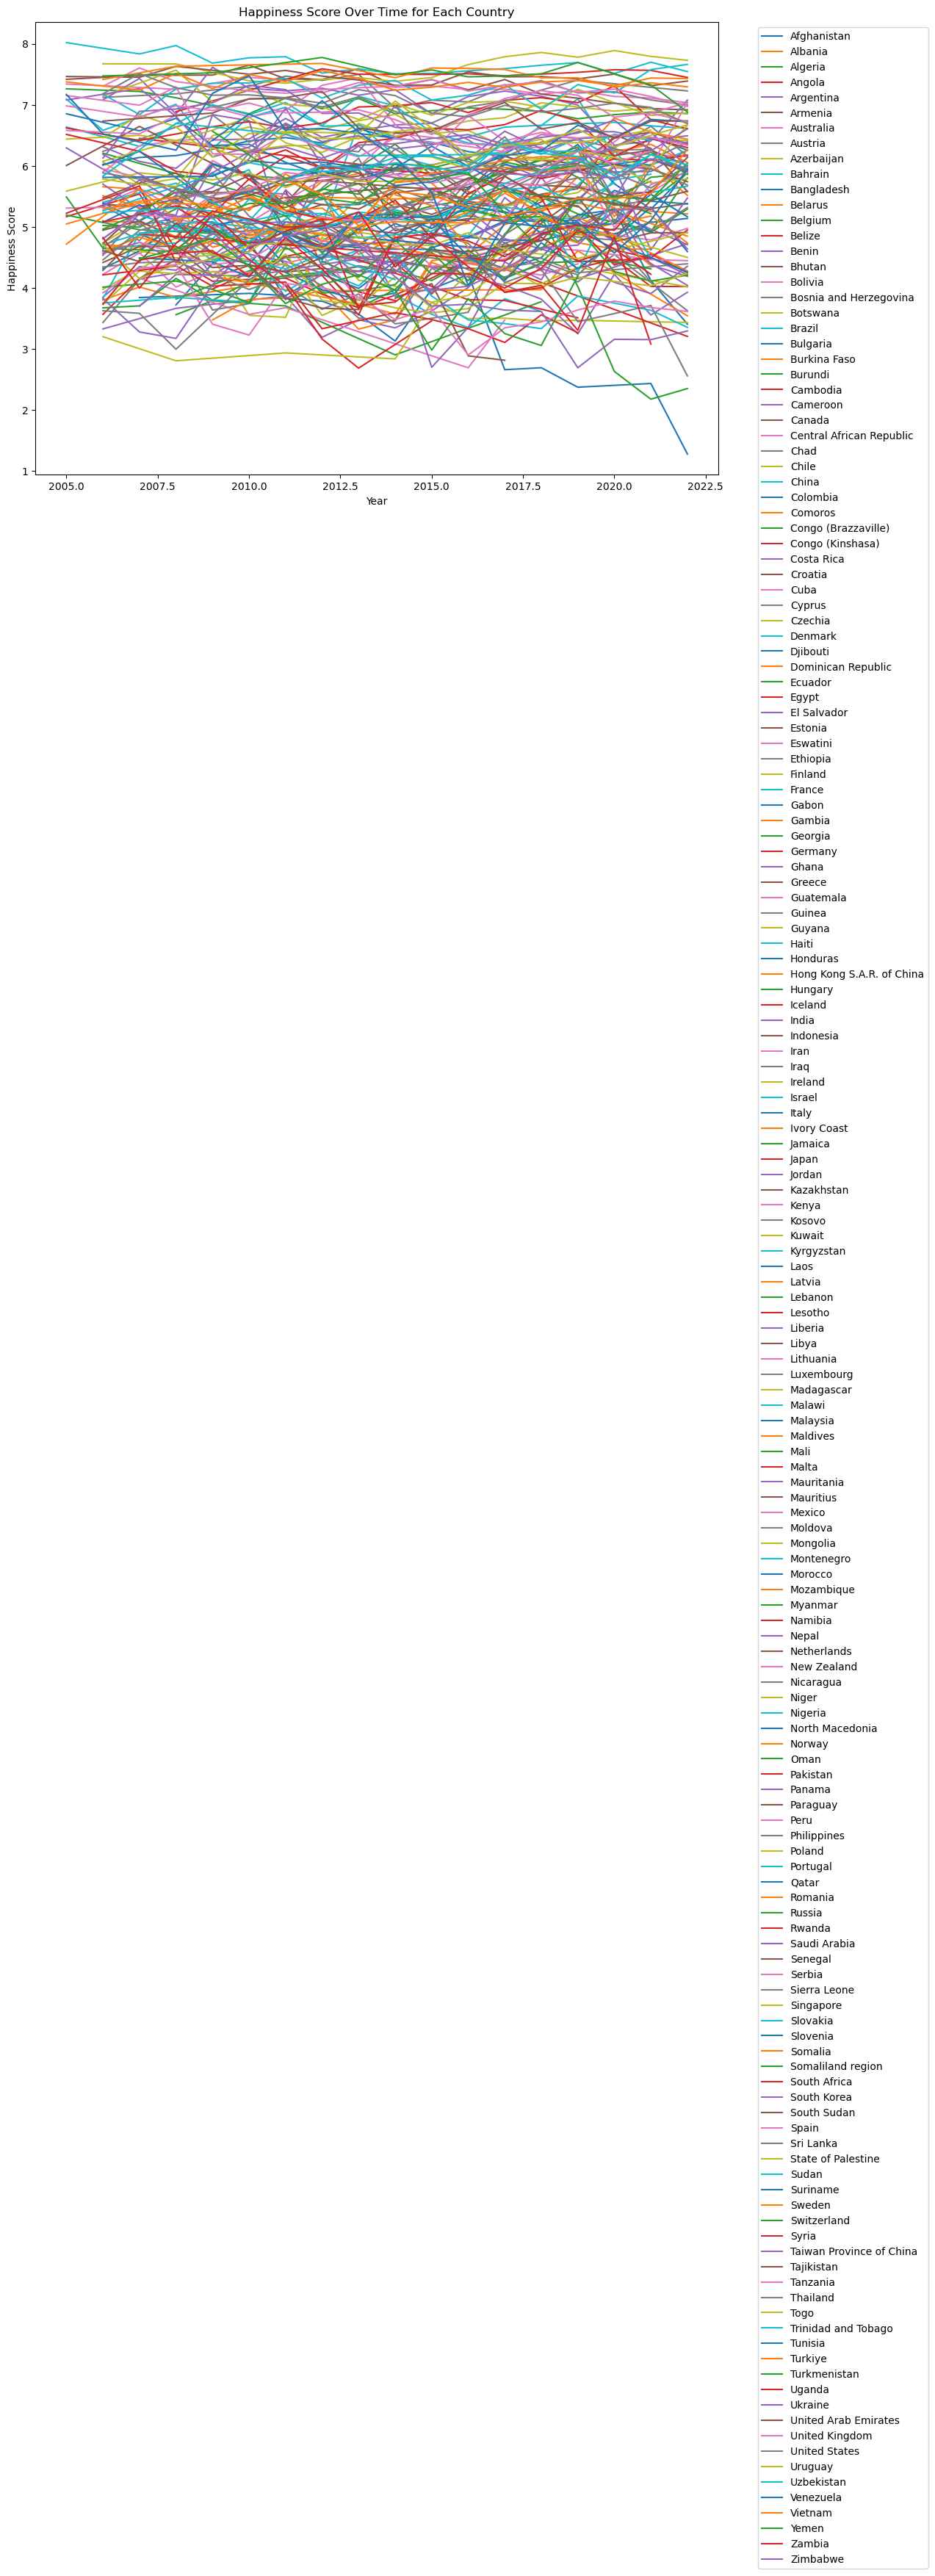

In [9]:

# Group the data by country
grouped_by_country = happiness.groupby('Country Name')

# Plot each country's time series
plt.ion()
plt.figure(figsize=(12, 8))
for country, data in grouped_by_country:
    plt.plot(data['Year'], data['Life Ladder'], label=country)

plt.title('Happiness Score Over Time for Each Country')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [10]:
import plotly.graph_objects as go

# Group the data by country
grouped_by_country = happiness.groupby('Country Name')

# Create traces for each country
traces = []
for country, data in grouped_by_country:
    trace = go.Scatter(x=data['Year'], y=data['Life Ladder'], mode='lines', name=country)
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='Happiness Score Over Time for Each Country',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Happiness Score'),
    hovermode='closest'
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Show plot
fig.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [12]:
# Set X and Y
X = happiness[['Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 
               'Generosity', 'Perceptions Of Corruption', 'Positive Affect', 'Negative Affect', 
               'Confidence In National Government']]
y = happiness['Life Ladder']

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Choose a model and train it
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Make predictions
y_pred = model.predict(X_test)

In [17]:
# Calculate accuracy score
accuracy = r2_score(y_test, y_pred)
print("Accuracy score:", accuracy)

Accuracy score: 0.7488389611607243


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Assuming X contains features and y contains the target variable (happiness score)
X = happiness[['Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption', 'Positive Affect', 'Negative Affect', 'Confidence In National Government']]
y = happiness['Life Ladder']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ]Random Forest model training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R-squared score:", r2)
print("Mean Squared Error:", mse)

R-squared score: 0.8488138978615353
Mean Squared Error: 0.1766307547100815


In [19]:
# SUZANNA'S ADVICE:

# instead of correlation, USE VIF. 
# When VIF is greater than 10 drop the variable